# Flood Fill para Detecção de Componentes Conexos
Uma forma de extrairmos componentes conexos de uma imagem é utilizarmos o algoritmo Flood Fill. Consistem em aplicar uma busca em largura na imagem procurando pixels de mesma intensidade de dada origem e que estejam em uma determinada vizinhança dela. Nesta implementação, consideramos uma vizinhança-4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

In [2]:
def flood_fill(img, origin):
    '''Encontra todos os pixels a partir de origin que tenham o mesmo valor de intensidade.
        Considera uma 4-vizinhança.

        Parâmetros
        ----------
        img : numpy array.
            Imagem a ser filtrada.
            
        origin : tuple
            Par de coordenadas (x, y) da imagem na qual deve-se iniciar a busca.
            
        Return
        -------
        obj : numpy array, contém tuplas de coordenadas.
            Coordenadas do objeto desejado na imagem.
    '''
    obj = []              # Lista com coordenadas do objeto (retornado)
    visited = set()       # Conjunto dos pontos visitados
    queue = deque()       # Fila de pontos que ainda precisam ser visitados
    
    queue.append(origin)
    while queue:
        
        row, col = queue.popleft()
        
        if (row, col) not in visited:
            # Se ainda não foi visitado e foi colocado na fila, adiciona 
            # como parte do objeto
            obj.append((row, col))
            visited.add((row, col))

            up    = (row-1, col)  # Vizinho de cima
            right = (row, col+1)  # Vizinho da direita
            down  = (row+1, col)  # Vizinho de baixo
            left  = (row, col-1)  # Vizinho da esquerda

            # Adiciona cada vizinho na fila contanto que:
            # 1. respeitem os limites da imagem,
            # 2. ainda não tenham sido visitados e
            # 3. tenham a mesma intensidade da origem
            if row != 0:
                if (up not in visited) and (img[up] == img[origin]):
                    queue.append(up)

            if col != img.shape[1]-1:
                if (right not in visited) and (img[right] == img[origin]):
                    queue.append(right)

            if row != img.shape[0]-1:
                if (down not in visited) and (img[down] == img[origin]):
                    queue.append(down)

            if col != 0:
                if (left not in visited) and (img[left] == img[origin]):
                    queue.append(left)
                    
    return obj

## Testando com matriz de 0s e 1s

In [3]:
# Criando uma matriz de 0s e 1s
img = np.array([[0, 0, 0, 1],
                [0, 1, 1, 0],
                [0, 1, 1, 1],
                [0, 0, 1, 1]])

obj = flood_fill(img, (1, 1))

In [4]:
print("Matriz Original: ")
print(img)
print("\n")

# Alterando os pontos retornados pelo flood fill para 2
img2 = img.copy()
for point in obj:
    img2[point] = 2
    
print("Matriz após Flood Fill")
print(img2)

Matriz Original: 
[[0 0 0 1]
 [0 1 1 0]
 [0 1 1 1]
 [0 0 1 1]]


Matriz após Flood Fill
[[0 0 0 1]
 [0 2 2 0]
 [0 2 2 2]
 [0 0 2 2]]


## Buscando Componentes em Imagens

In [5]:
img = plt.imread('componentes.tiff')

obj1 = flood_fill(img, (20,20))
obj2 = flood_fill(img, (60,20))
obj3 = flood_fill(img, (80,78))

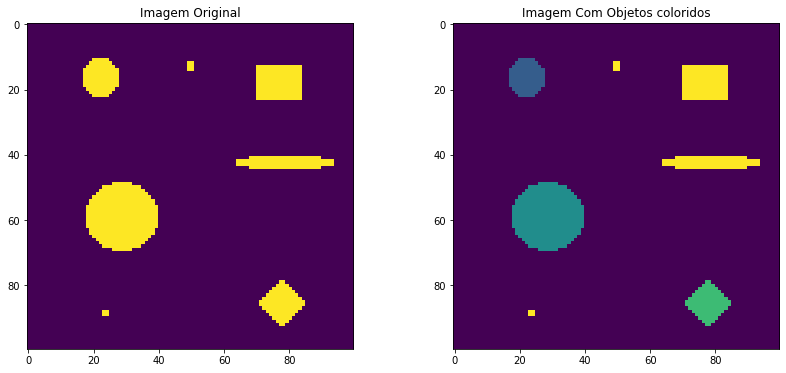

In [6]:
img_colored = img.copy()

# Colorindo o primeiro objeto na imagem
for point in obj1:
    img_colored[point] = 75
    
# Colorindo o primeiro objeto na imagem
for point in obj2:
    img_colored[point] = 125
    
# Colorindo o primeiro objeto na imagem
for point in obj3:
    img_colored[point] = 175
    
plt.figure(figsize=[14, 6])
plt.subplot(1, 2, 1)
plt.title("Imagem Original")
plt.imshow(img, vmin=0, vmax=255)


plt.subplot(1, 2, 2)
plt.title("Imagem Com Objetos coloridos")
plt.imshow(img_colored, vmin=0, vmax=255)

In [7]:
img = plt.imread('blob.tiff')

obj = flood_fill(img, (25,25))
bg  = flood_fill(img, (0,0))

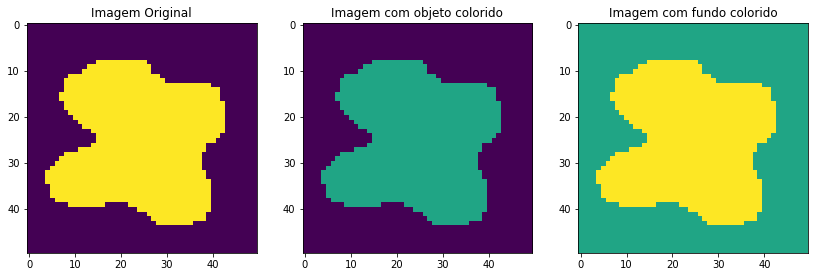

In [8]:
img_colored_1 = img.copy()
img_colored_2 = img.copy()

for point in obj:
    img_colored_1[point] = 150
    
for point in bg:
    img_colored_2[point] = 150
    
plt.figure(figsize=[14, 6])
plt.subplot(1, 3, 1)
plt.title("Imagem Original")
plt.imshow(img, vmin=0, vmax=255)


plt.subplot(1, 3, 2)
plt.title("Imagem com objeto colorido")
plt.imshow(img_colored_1, vmin=0, vmax=255)

plt.subplot(1, 3, 3)
plt.title("Imagem com fundo colorido")
plt.imshow(img_colored_2, vmin=0, vmax=255)